In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Matplotlib created a temporary cache directory at C:\Users\Hp\AppData\Local\Temp\matplotlib-23iql_vj because the default path (C:\Users\Hp\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def f(x,y):
    return (2-x)**2 + 256*((y - x**2)**2)

In [3]:
def df_dx(x,y) :
    return -2*(2-x) - 1024*(y-x**2)*x

def df_dy(x,y) :
    return 512*(y-x**2)

In [4]:
def L2Norm(x,y) :
    grad_x = df_dx(x,y);
    grad_y = df_dy(x,y);
    return np.sqrt(grad_x**2 + grad_y**2)


In [5]:
def gradient_descent(x_start , y_start , alpha_not , gamma , rho) :
    tablelist=[]
    tau_values = []
    iteration_counts = []

    for alp_not in alpha_not :

        x = x_start
        y = y_start
        alpha = alp_not
        history =[]
        count = 0
        norm = L2Norm(x,y)
        TLevel = 10**(-10)

        while(f(x-alpha*df_dx(x,y) , y-alpha*df_dy(x,y)) > (f(x,y)-alpha*gamma*(df_dx(x,y)**2 + df_dy(x,y)**2))) :
            alpha = rho * alpha
        while(norm > TLevel) :
            grad_x = df_dx(x,y)
            grad_y = df_dy(x,y)

            
            x = x - alpha*grad_x
            y = y - alpha*grad_y

            norm = L2Norm(x,y)
            count = count + 1;
                

            history.append((x,y,f(x,y)))
        
        
        iteration_counts.append(count)

        tablelist.append((alp_not , count , x , y , f(x,y) ))
        table_array = np.array(tablelist)

    print("alpha_not         Iterations      x       y       f(x,y) ")
    print(table_array)

    plt.figure(figsize=(8, 6))
    plt.plot(alpha_not, iteration_counts, marker='o', color='blue', label='Iterations vs Tolerance')
   
    plt.xlabel('alpha_not')
    plt.ylabel('Number of Iterations')
    plt.title('Iterations vs alpha_not')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()


    return x,y,f(x,y),history 



In [6]:
x_range = np.arange(-150,150,0.1)
y_range = np.arange(-150,150,0.1)

X,Y = np.meshgrid(x_range,y_range)

Z = f(X,Y)

x_start , y_start = 100 , 100
alpha_not = [0.25,0.1,0.01]

gamma , rho = 0.5 , 0.5

x_dash ,y_dash ,f_dash ,history = gradient_descent(x_start , y_start , alpha_not , gamma , rho)


MemoryError: 

In [ ]:
print(f_dash)
print("Minimiser in x = ", x_dash)
print("Minimiser in y = ", y_dash)

4.2222082133960004e-20
Minimiser in x =  2.000000000205457
Minimiser in y =  4.000000000822021


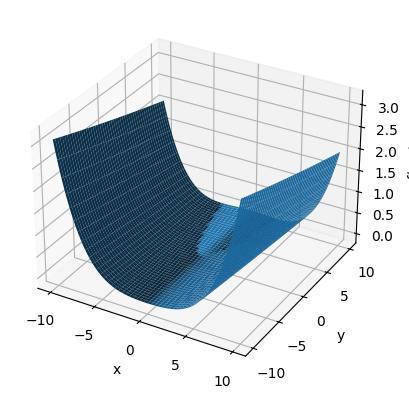

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.scatter(*zip(*history), c='r', marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()
